In [17]:
%matplotlib inline
import scipy
from scipy import stats

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [32]:
gdp_gini_subset = pd.read_csv('wb_data2.csv', sep='\t')
pisa = pd.read_csv('pisa_data.csv', sep='\t')

In [40]:
gdp_gini_15 = gdp_gini_subset[gdp_gini_subset.date == '2015-01-01' ]
pisa_15 = pisa[pisa.date == '2015-01-01']

In [41]:
scaled = gdp_gini_15[['gdp','gini']]
scaled_data = preprocessing.scale(scaled)
gdp_gini_15[['gdp','gini']] = scaled_data
print gdp_gini_15.head()

   iso_code      country        date       gdp      gini
1        AW        Aruba  2015-01-01  0.723719  0.463084
18       AF  Afghanistan  2015-01-01 -0.804623  0.463084
35       AO       Angola  2015-01-01 -0.590767  0.463084
52       AL      Albania  2015-01-01 -0.372562 -1.230754
69       AD      Andorra  2015-01-01  2.356549  0.456929


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
scaled = pisa_15[['Math', 'Reading']]
scaled_data = preprocessing.scale(scaled)
pisa_15[['Math', 'Reading']] = scaled_data
print pisa_15.head()

   iso_code               country        date      Math   Reading
0        AL               Albania  2015-01-01 -0.861740 -1.069608
4        AE  United Arab Emirates  2015-01-01 -0.595764 -0.510775
5        AR             Argentina  2015-01-01 -0.938302 -0.673567
10       AU             Australia  2015-01-01  0.637294  0.859626
16       AT               Austria  2015-01-01  0.690136  0.503285


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
df_15 = pd.merge(gdp_gini_15, pisa_15, how='right', on=['iso_code','country','date'])
print df_15.head()

  iso_code               country        date       gdp      gini      Math  \
0       AL               Albania  2015-01-01 -0.372562 -1.230754 -0.861740   
1       AE  United Arab Emirates  2015-01-01  2.259207  0.456929 -0.595764   
2       AR             Argentina  2015-01-01  0.023180  0.456929 -0.938302   
3       AU             Australia  2015-01-01  1.194245 -0.494624  0.637294   
4       AT               Austria  2015-01-01  1.326117 -1.043644  0.690136   

    Reading  
0 -1.069608  
1 -0.510775  
2 -0.673567  
3  0.859626  
4  0.503285  


/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


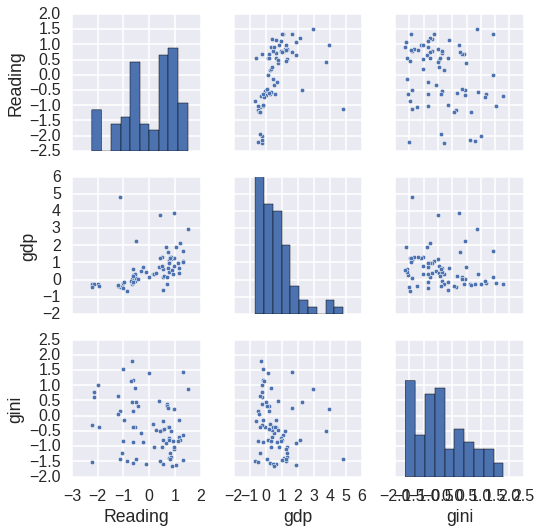

In [47]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.pairplot(df_15[['Reading','gdp', 'gini']])
sns.plt.show()

#### GINI looks not very perspective; GDP more interesting

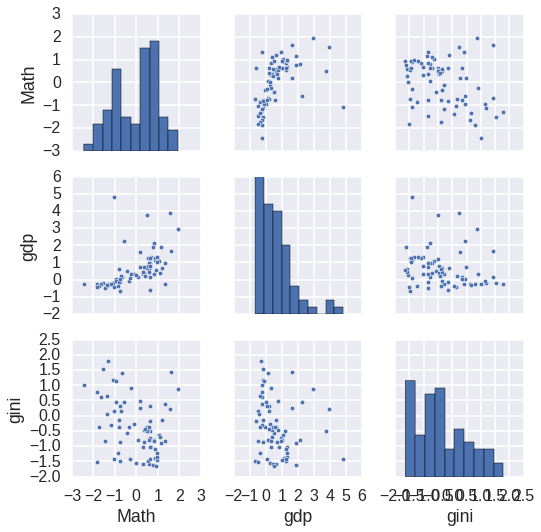

In [48]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.pairplot(df_15[['Math','gdp', 'gini']])
sns.plt.show()

In [65]:
import statsmodels.formula.api as smf
import numpy as np

lm = smf.ols(formula='Math ~ np.log(gdp)', data=df_15).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Math   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     16.79
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           0.000160
Time:                        00:57:26   Log-Likelihood:                -44.330
No. Observations:                  50   AIC:                             92.66
Df Residuals:                      48   BIC:                             96.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.5787      0.091      6.381      0.000         0.396     0.761
np.log(gdp)     0.3229      0.079      4.097      0.000         0.164     0.481
==============================================================================
Omnibus:                       17.576   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.218
Skew:                          -1.189   Prob(JB):                     5.51e-06
Kurtosis:                       5.444   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lm = smf.ols(formula='Reading ~ np.log(gdp)', data=df_15).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reading   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     10.83
Date:                Mon, 02 Oct 2017   Prob (F-statistic):            0.00188
Time:                        00:58:04   Log-Likelihood:                -44.399
No. Observations:                  50   AIC:                             92.80
Df Residuals:                      48   BIC:                             96.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.5709      0.091      6.287      0.000         0.388     0.753
np.log(gdp)     0.2597      0.079      3.291      0.002         0.101     0.418
==============================================================================
Omnibus:                       15.548   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.253
Skew:                          -1.183   Prob(JB):                     0.000109
Kurtosis:                       4.778   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lm = smf.ols(formula='Math ~ gini', data=df_15).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Math   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     8.824
Date:                Mon, 02 Oct 2017   Prob (F-statistic):            0.00409
Time:                        00:35:01   Log-Likelihood:                -96.473
No. Observations:                  71   AIC:                             196.9
Df Residuals:                      69   BIC:                             201.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1404      0.123     -1.143      0.257        -0.385     0.105
gini          -0.3772      0.127     -2.970      0.004        -0.631    -0.124
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.003
Skew:                          -0.012   Prob(JB):                        0.998
Kurtosis:                       3.022   Cond. No.                         1.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lm = smf.ols(formula='Reading ~ gini', data=df_15).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reading   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     5.079
Date:                Mon, 02 Oct 2017   Prob (F-statistic):             0.0274
Time:                        00:35:17   Log-Likelihood:                -98.223
No. Observations:                  71   AIC:                             200.4
Df Residuals:                      69   BIC:                             205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1092      0.126     -0.867      0.389        -0.360     0.142
gini          -0.2933      0.130     -2.254      0.027        -0.553    -0.034
==============================================================================
Omnibus:                        4.032   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.976
Skew:                          -0.563   Prob(JB):                        0.137
Kurtosis:                       2.726   Cond. No.                         1.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X = df_15[['gdp', 'gini']]
y = df_15['Math']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Math   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     16.25
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           1.71e-06
Time:                        01:01:35   Log-Likelihood:                -86.878
No. Observations:                  71   AIC:                             179.8
Df Residuals:                      68   BIC:                             186.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3919      0.121     -3.235      0.002        -0.634    -0.150
gdp            0.4397      0.096      4.594      0.000         0.249     0.631
gini          -0.2806      0.114     -2.467      0.016        -0.507    -0.054
==============================================================================
Omnibus:                       12.644   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.453
Skew:                          -0.682   Prob(JB):                     9.84e-05
Kurtosis:                       5.092   Cond. No.                         2.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X = df_15[['gdp', 'gini']]
y = df_15['Reading']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Reading   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     12.24
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           2.87e-05
Time:                        01:01:59   Log-Likelihood:                -89.826
No. Observations:                  71   AIC:                             185.7
Df Residuals:                      68   BIC:                             192.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3523      0.126     -2.790      0.007        -0.604    -0.100
gdp            0.4251      0.100      4.260      0.000         0.226     0.624
gini          -0.1999      0.119     -1.687      0.096        -0.436     0.037
==============================================================================
Omnibus:                       14.221   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.916
Skew:                          -0.978   Prob(JB):                     0.000350
Kurtosis:                       4.246   Cond. No.                         2.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""